# Data exploration on tweets about Messi and Ronaldo, by Ibrahim SEROUIS 💻

# What to expect 🤔

In this Notebook, we'll explore the contents of the ["_final" version of the tweets collected here](https://www.kaggle.com/datasets/ibrahimserouis99/twitter-sentiment-analysis-and-word-embeddings). 

We are going to generate : 
- **A wordcloud** representing the frequency of words 
- **A stacked area chart** representing the total engagement by day 
- **A bar chart** showcasing the most prevalent countries
- **A bar chart** showcasing the contents length
- **A pie chart** representing the most prevalent sources

# Libraries

In [1]:
!pip install --user wordcloud

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Load the files and setup 🛠

## Load

In [3]:
dataset_ronaldo = pd.read_csv("../input/twitter-sentiment-analysis-and-word-embeddings/ronaldo_final.csv", encoding="utf-8")
dataset_messi = pd.read_csv("../input/twitter-sentiment-analysis-and-word-embeddings/messi_final.csv", encoding="utf-8")

## Display samples

### Ronaldo

In [4]:
dataset_ronaldo.head(3)

tweet_id            author_id  \
0  1523587244572872704  1383801795823116291   
1  1523587203351293953  1011901831411322880   
2  1523587136968003584            288628771   

                                             content lang  \
0                   where is the band leader ronaldo   en   
1  all untradeable except alex telles what could ...   en   
2                                              or cr   en   

                       date               source geo  retweet_count  \
0  2022-05-09T08:54:40.000Z  Twitter for Android  -1            0.0   
1  2022-05-09T08:54:30.000Z      Twitter Web App  -1            0.0   
2  2022-05-09T08:54:14.000Z   Twitter for iPhone  -1            0.0   

   like_count  quote_count  prediction     label  
0         0.0          0.0    0.728374  Positive  
1         0.0          0.0    0.706692  Positive  
2         0.0          0.0    0.722615  Positive

### Messi

In [5]:
dataset_messi.head(3)

tweet_id            author_id  \
0  1523587143632703488  1292468372618326023   
1  1523587126595825664           3985914141   
2  1523587117556715520  1480936861790924801   

                                             content lang  \
0  oh yeah and messi contributed so heavily to hi...   en   
1  this level of stretch is insane he literally t...   en   
2                  fred and messi tradeable thoughts   en   

                       date               source geo  retweet_count  \
0  2022-05-09T08:54:16.000Z  Twitter for Android  -1              0   
1  2022-05-09T08:54:12.000Z   Twitter for iPhone  -1              0   
2  2022-05-09T08:54:10.000Z  Twitter for Android  -1              0   

   like_count  quote_count  prediction     label  
0           0            0    0.611823  Negative  
1           0            0    0.629123  Positive  
2           1            0    0.510315  Negative

## Create the subsets 

### Messi subsets

In [6]:
messi_negatives = dataset_messi[dataset_messi["label"]=="Negative"]
messi_positives = dataset_messi[dataset_messi["label"]=="Positive"]

print(f"Messi\n----------------------------------------------------\n \
Negative tweets : {len(messi_negatives)} || Positive tweets: {len(messi_positives)}")

Messi
----------------------------------------------------
 Negative tweets : 80446 || Positive tweets: 133521


### Ronaldo subsets

In [7]:
ronaldo_negatives = dataset_ronaldo[dataset_ronaldo["label"]=="Negative"]
ronaldo_positives = dataset_ronaldo[dataset_ronaldo["label"]=="Positive"]

print(f"Ronaldo\n----------------------------------------------------\n \
Negative tweets : {len(ronaldo_negatives)} || Positive tweets: {len(ronaldo_positives)}")

Ronaldo
----------------------------------------------------
 Negative tweets : 89004 || Positive tweets: 161654


# Data exploration 🔍 

## Contents length 📄

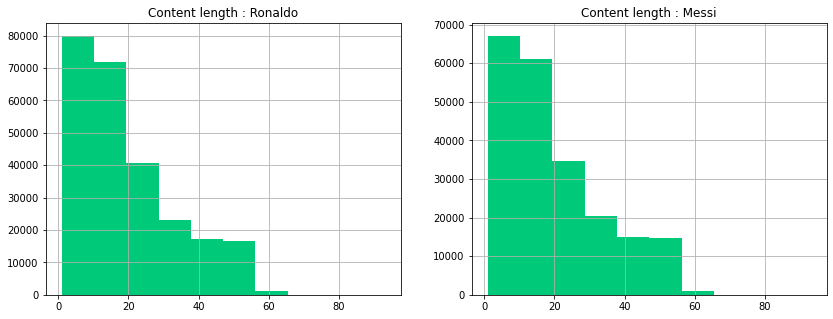

In [8]:
# Create the plot
plt.figure(figsize=(14,5))

# Ronaldo subplot (1 lines, 2 columns, first column)
plt.subplot(1,2,1)
# Assign each tweet to its length : convert to an array the calculate the length
dataset_ronaldo["content"].str.split().map(lambda tweet: len(tweet)).hist(
    color="#00c979"
)
# Set the title 
plt.title("Content length : Ronaldo")

# Messi subplot (1 lines, 2 columns, second column)
plt.subplot(1,2,2)
# Assign each tweet to its length : convert to an array the calculate the length
dataset_messi["content"].str.split().map(lambda tweet: len(tweet)).hist(
    color="#00c979"
)
# Set the title 
plt.title("Content length : Messi")

# Display the results 
plt.show()

## Most used words : Word Cloud ☁️

In [9]:
# Get all the positive tweets as a single corpus 
messi_positives_text = " ".join(tweet for tweet in messi_positives.content)
ronaldo_positives_text = " ".join(tweet for tweet in ronaldo_positives.content)
# Get all the negative tweets as a single corpus 
messi_negatives_text = " ".join(tweet for tweet in messi_negatives.content)
ronaldo_negatives_text = " ".join(tweet for tweet in ronaldo_negatives.content)

### Setup the wordcloud

Most important parameters : 

- **Mask :** an 8-bit image array which will decide the "shape" of the word cloud. We'll use the one in the input files. 
- **Stopwords :** a set of words that are filtered out of our analysis. The word cloud package already comes with the most usual stopwords. 

In [10]:
# Setup the mask 

# Load the image mask and convert to 8-bits (L = 8-bit pixels, black and white image)
mask = Image.open("../input/twitter-sentiment-analysis-and-word-embeddings/Visualization/cloud.png").convert("L")
# Create an array from the mask
mask = np.array(mask)

###### Create the wordclouds

Most important parameters : 
 - **Mask :** the one we've set right above
 - **Stopwords** : we're going to use the ones from the package and their respective names (Messi, CR7...). However, feel free to add more to the set of stopwords. 
 - **Minimum word length :** Minimum number of letters a word must have to be included

In [11]:
# Add some stopwords for tweets about Messi
stopwords_messi = set(STOPWORDS)
stopwords_messi.add("messi")
# Add some stopwords for tweets about Ronaldo
stopwords_ronaldo = set(STOPWORDS)
stopwords_ronaldo.add("cr7")
stopwords_ronaldo.add("cr")
stopwords_ronaldo.add("ronaldo")
stopwords_ronaldo.add("cristiano")

In [12]:
# Negative tweets about Messi
wordcloud_messi_negatives = WordCloud(stopwords=stopwords_messi,min_word_length=2,
                                      mask=mask,background_color="white",width=500, 
                                      contour_width=2, contour_color="black").generate_from_text(messi_negatives_text)
# Positive tweets about Messi
wordcloud_messi_positives = WordCloud(stopwords=stopwords_messi,min_word_length=2,
                                      mask=mask,background_color="white",width=500, 
                                      contour_width=2, contour_color="black").generate_from_text(messi_positives_text)
# Negative tweets about Ronaldo
wordcloud_ronaldo_negatives = WordCloud(stopwords=stopwords_ronaldo,min_word_length=2,
                                      mask=mask,background_color="white",width=500, 
                                      contour_width=2, contour_color="black").generate_from_text(ronaldo_negatives_text)

# Positive tweets about Ronaldo
wordcloud_ronaldo_positives = WordCloud(stopwords=stopwords_ronaldo,min_word_length=2,
                                      mask=mask,background_color="white",width=500, 
                                      contour_width=2, contour_color="black").generate_from_text(ronaldo_positives_text)

In [13]:
# Set the figure titles
titles = ["Negative words used against Messi", "Positive words used towards Messi", 
          "Negative words used against Ronaldo", "Positive words used towards Ronaldo"]

# Set the wordclouds list
wordclouds = [wordcloud_messi_negatives, wordcloud_messi_positives, 
             wordcloud_ronaldo_negatives, wordcloud_ronaldo_positives]

### Results

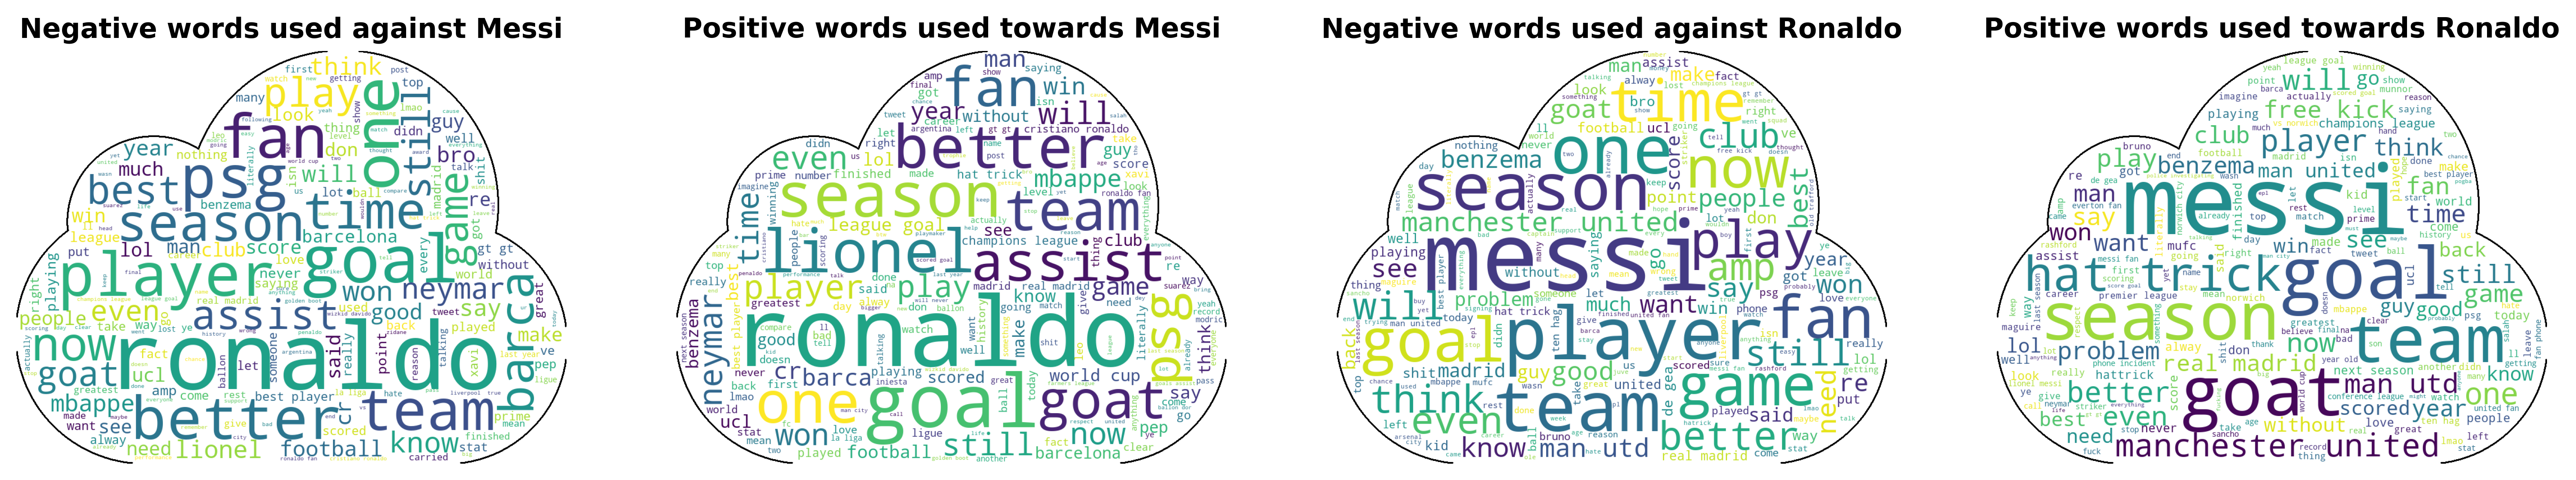

In [14]:
# Create the figure with 4 columns 
figure, axes = plt.subplots(nrows=1, ncols=4)
# Set the figure size
figure.set_size_inches(w=20, h=18)
# Increase the resolution 
plt.gcf().set_dpi(400)

# Loop through the axis and figures
for i in range(4):
    # Remove the axis (coordinates around the plot area)
    axes[i].axis("off")
    # Set the title accordingly
    axes[i].set_title(titles[i], fontweight="bold")
    # Show the corresponding wordcloud 
    axes[i].imshow(wordclouds[i])

## Engagements ❤️🔁

### Drop unncessary columns

In [15]:
stats_messi = dataset_messi.drop(columns=["tweet_id", "author_id", "content", "label", "lang", "prediction", "geo"])
stats_ronaldo = dataset_ronaldo.drop(columns=["tweet_id", "author_id", "content", "label", "lang", "prediction", "geo"])

stats_messi.head()

date               source  retweet_count  like_count  \
0  2022-05-09T08:54:16.000Z  Twitter for Android              0           0   
1  2022-05-09T08:54:12.000Z   Twitter for iPhone              0           0   
2  2022-05-09T08:54:10.000Z  Twitter for Android              0           1   
3  2022-05-09T08:54:09.000Z      Twitter Web App              0           0   
4  2022-05-09T08:54:03.000Z  Twitter for Android              0           0   

   quote_count  
0            0  
1            0  
2            0  
3            0  
4            0

 ### Convert the dates to a more convenient datetime format (yy-mm-dd)

In [16]:
# Convert to a date time object then format 
stats_messi["date"] = pd.to_datetime(stats_messi.date).dt.strftime("%y-%m-%d")
stats_ronaldo["date"] = pd.to_datetime(stats_ronaldo.date).dt.strftime("%y-%m-%d")
# Display some results
stats_messi.head()

date               source  retweet_count  like_count  quote_count
0  22-05-09  Twitter for Android              0           0            0
1  22-05-09   Twitter for iPhone              0           0            0
2  22-05-09  Twitter for Android              0           1            0
3  22-05-09      Twitter Web App              0           0            0
4  22-05-09  Twitter for Android              0           0            0

### Engagements by day : Messi

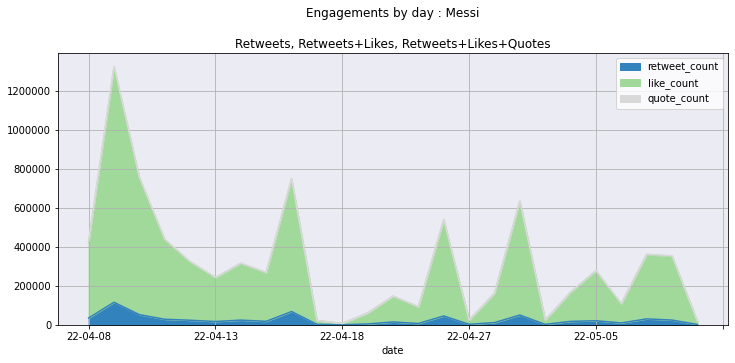

In [17]:
# Plot stats by day
figure = stats_messi.groupby(by="date").sum().plot(
        kind="area", 
        figsize=(12,5), 
        title="Engagements by day : Messi\n\nRetweets, Retweets+Likes, Retweets+Likes+Quotes",
        grid=True, 
        cmap="tab20c"
)
# Set the background color
figure.set_facecolor("#ebebf3")
# Prevent matplotlib from showing exponential axis values (1e6, 1e5...)
plt.ticklabel_format(style="plain", axis="y")
# Display the stats
plt.show()

### Engagements by day : Ronaldo

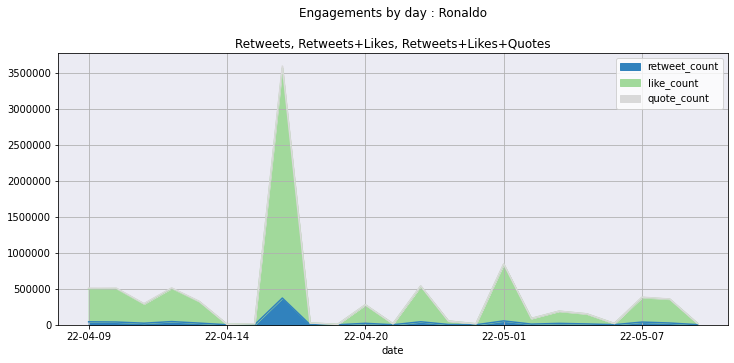

In [18]:
# Plot stats by day
figure = stats_ronaldo.groupby(by="date").sum().plot(
        kind="area", 
        figsize=(12,5), 
        title="Engagements by day : Ronaldo\n\nRetweets, Retweets+Likes, Retweets+Likes+Quotes",
        grid=True, 
        stacked=True, 
        cmap="tab20c"
)
# Set the background color
figure.set_facecolor("#ebebf3")
# Prevent matplotlib from showing exponential axis values (1e6, 1e5...)
plt.ticklabel_format(style="plain", axis="y")
# Display the stats
plt.show()

## Data by country 🌍

In [19]:
# Drop null locations 
messi = dataset_messi.dropna(subset=["geo"])
ronaldo = dataset_ronaldo.dropna(subset=["geo"])
# Get the subsets containing contents with countries available 
messi_with_countries = messi[messi["geo"]!="-1"]
ronaldo_with_countries = ronaldo[ronaldo["geo"]!="-1"]
# Display some results 
ronaldo_with_countries.head(3)

tweet_id            author_id  \
56   1523586034097094656  1329917612042629120   
827  1523564199829737476   745698443251703812   
909  1523561571334561793            229001309   

                                               content lang  \
56                     united literally signed ronaldo   en   
827  even today players like mahrez salah mane afte...   en   
909  now i believe what sir alex ferguson said abou...   en   

                         date              source                   geo  \
56   2022-05-09T08:49:52.000Z  Twitter for iPhone               Ireland   
827  2022-05-09T07:23:06.000Z  Twitter for iPhone                 India   
909  2022-05-09T07:12:39.000Z  Twitter for iPhone  United Arab Emirates   

     retweet_count  like_count  quote_count  prediction     label  
56             0.0         0.0          0.0    0.726825  Positive  
827            0.0         0.0          0.0    0.700613  Positive  
909            0.0         0.0          0.0    0.699885  Positive

In [20]:
# Get the top countries
top_countries_messi = messi_with_countries.geo.value_counts().to_dict()
top_countries_ronaldo = ronaldo_with_countries.geo.value_counts().to_dict()

### Top countries : Messi 

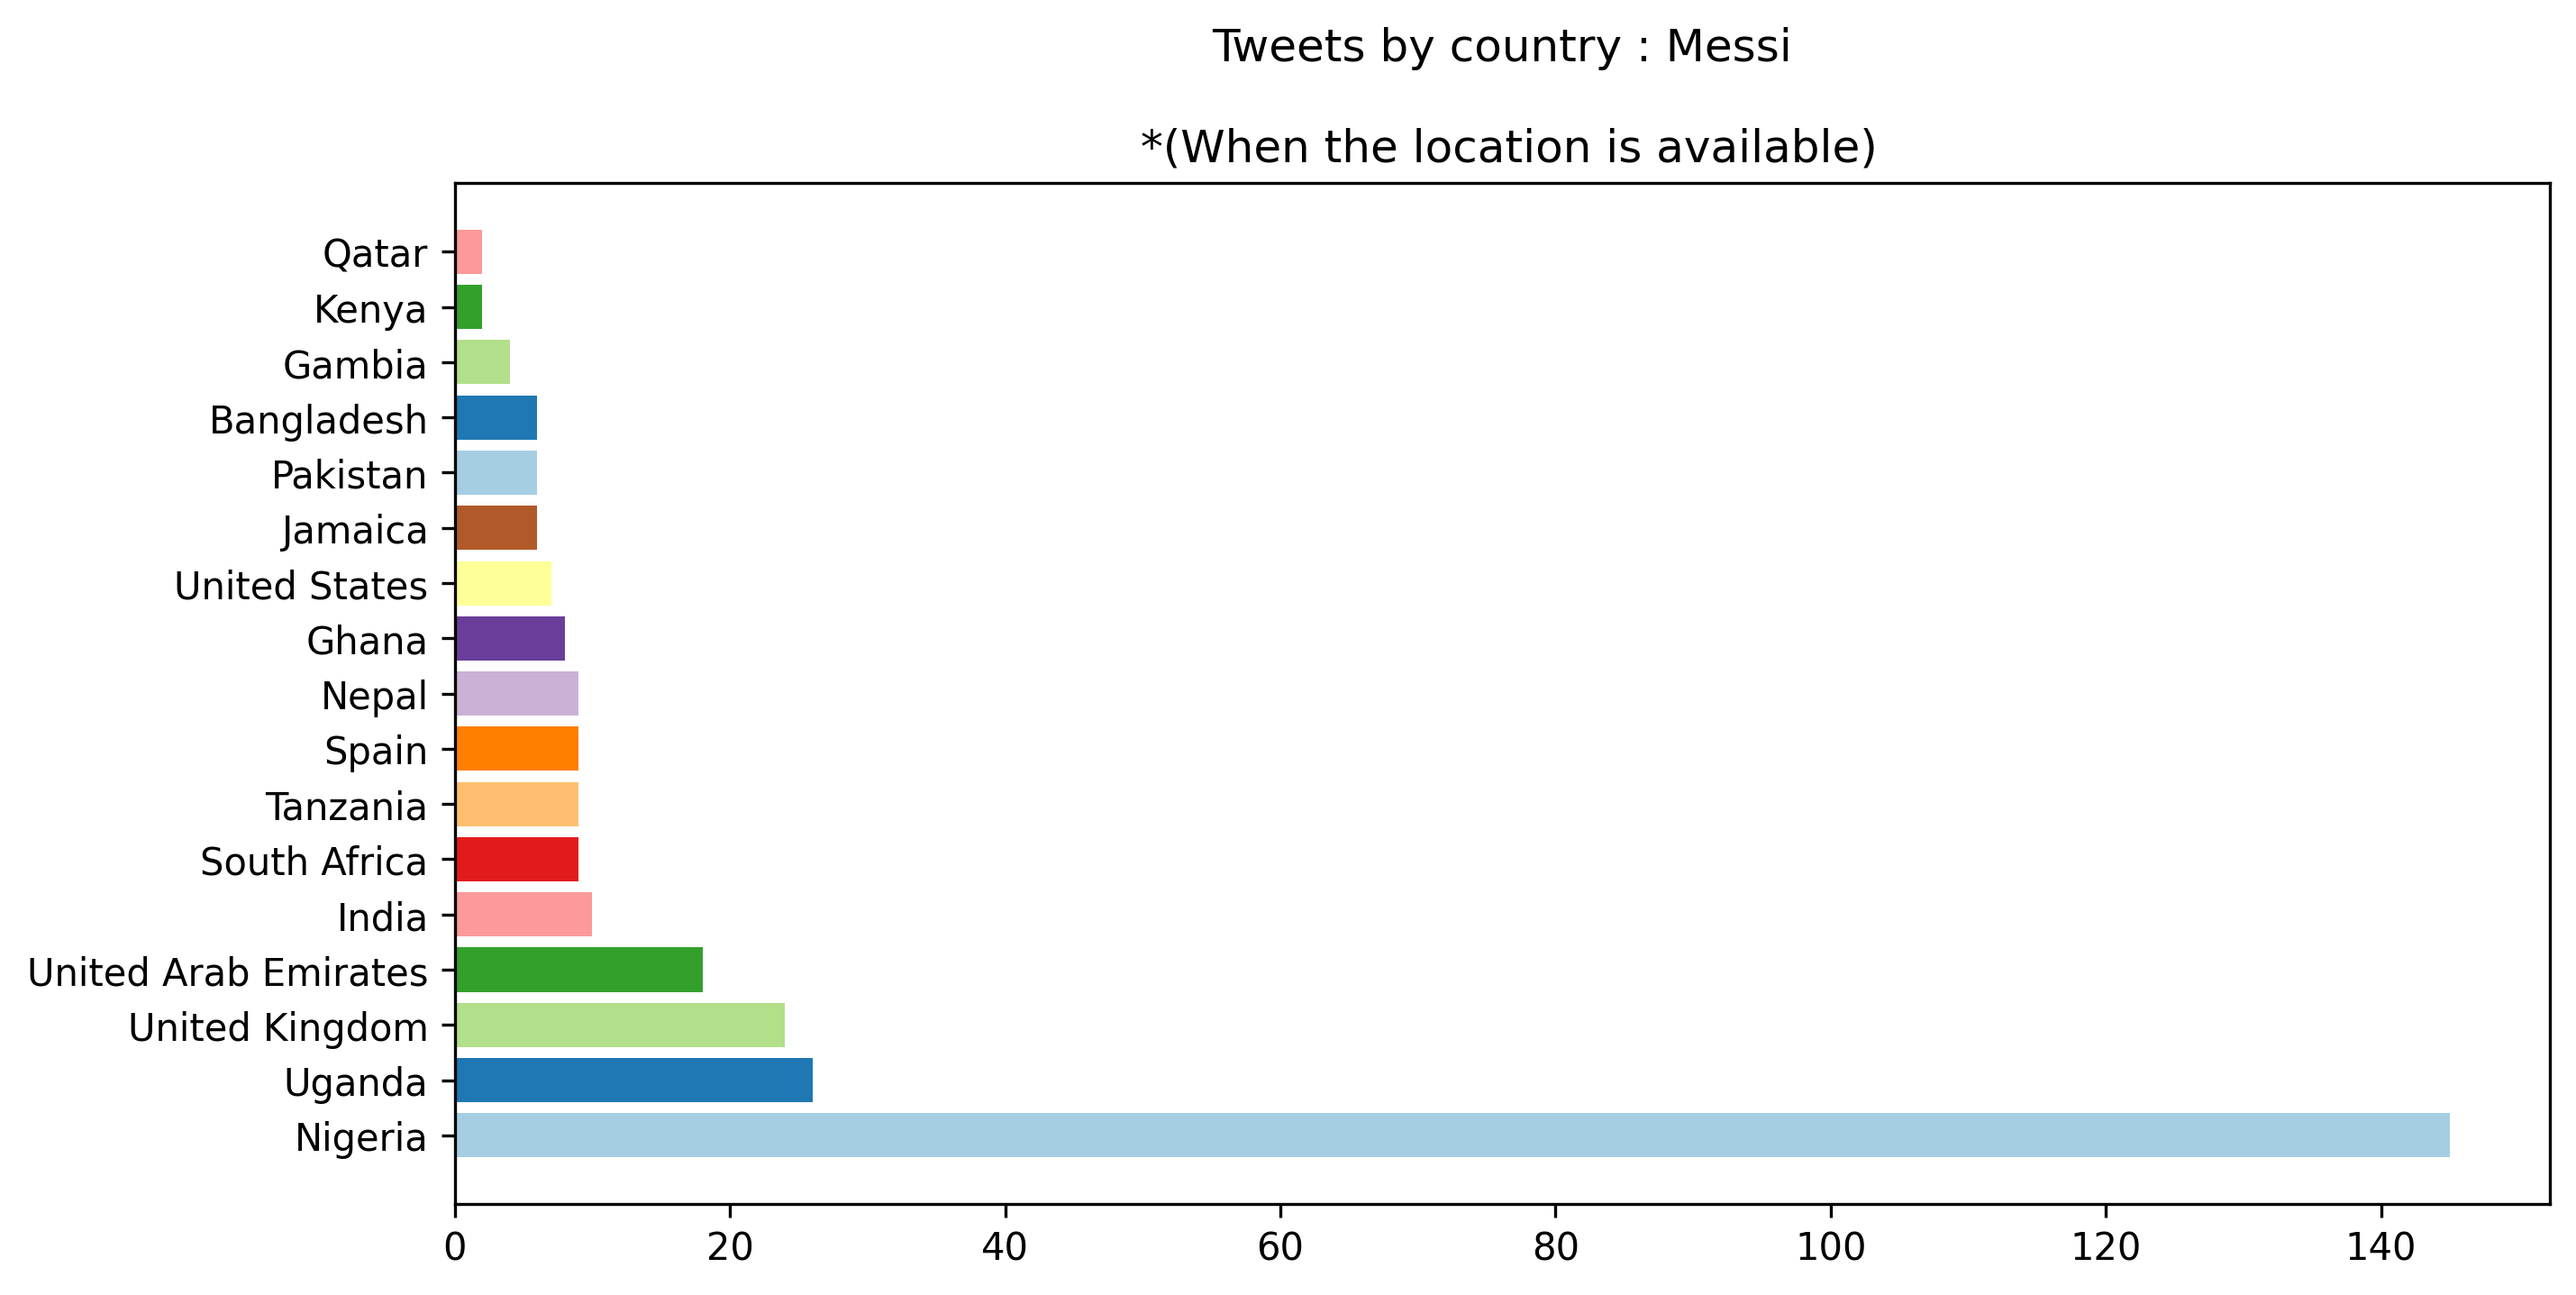

In [21]:
# Get the data
keys_messi = list(top_countries_messi.keys())
values_messi = list(top_countries_messi.values())

# Get the color map
color_map = plt.get_cmap("Paired")

# Setup the figure
plt.figure(figsize=(10,5), dpi=300)
# Set the title 
plt.title("Tweets by country : Messi\n\n *(When the location is available)")
# Setup the plot
plt.barh(keys_messi, values_messi, color=color_map.colors)
# Display results
plt.show()

### Top countries : Ronaldo

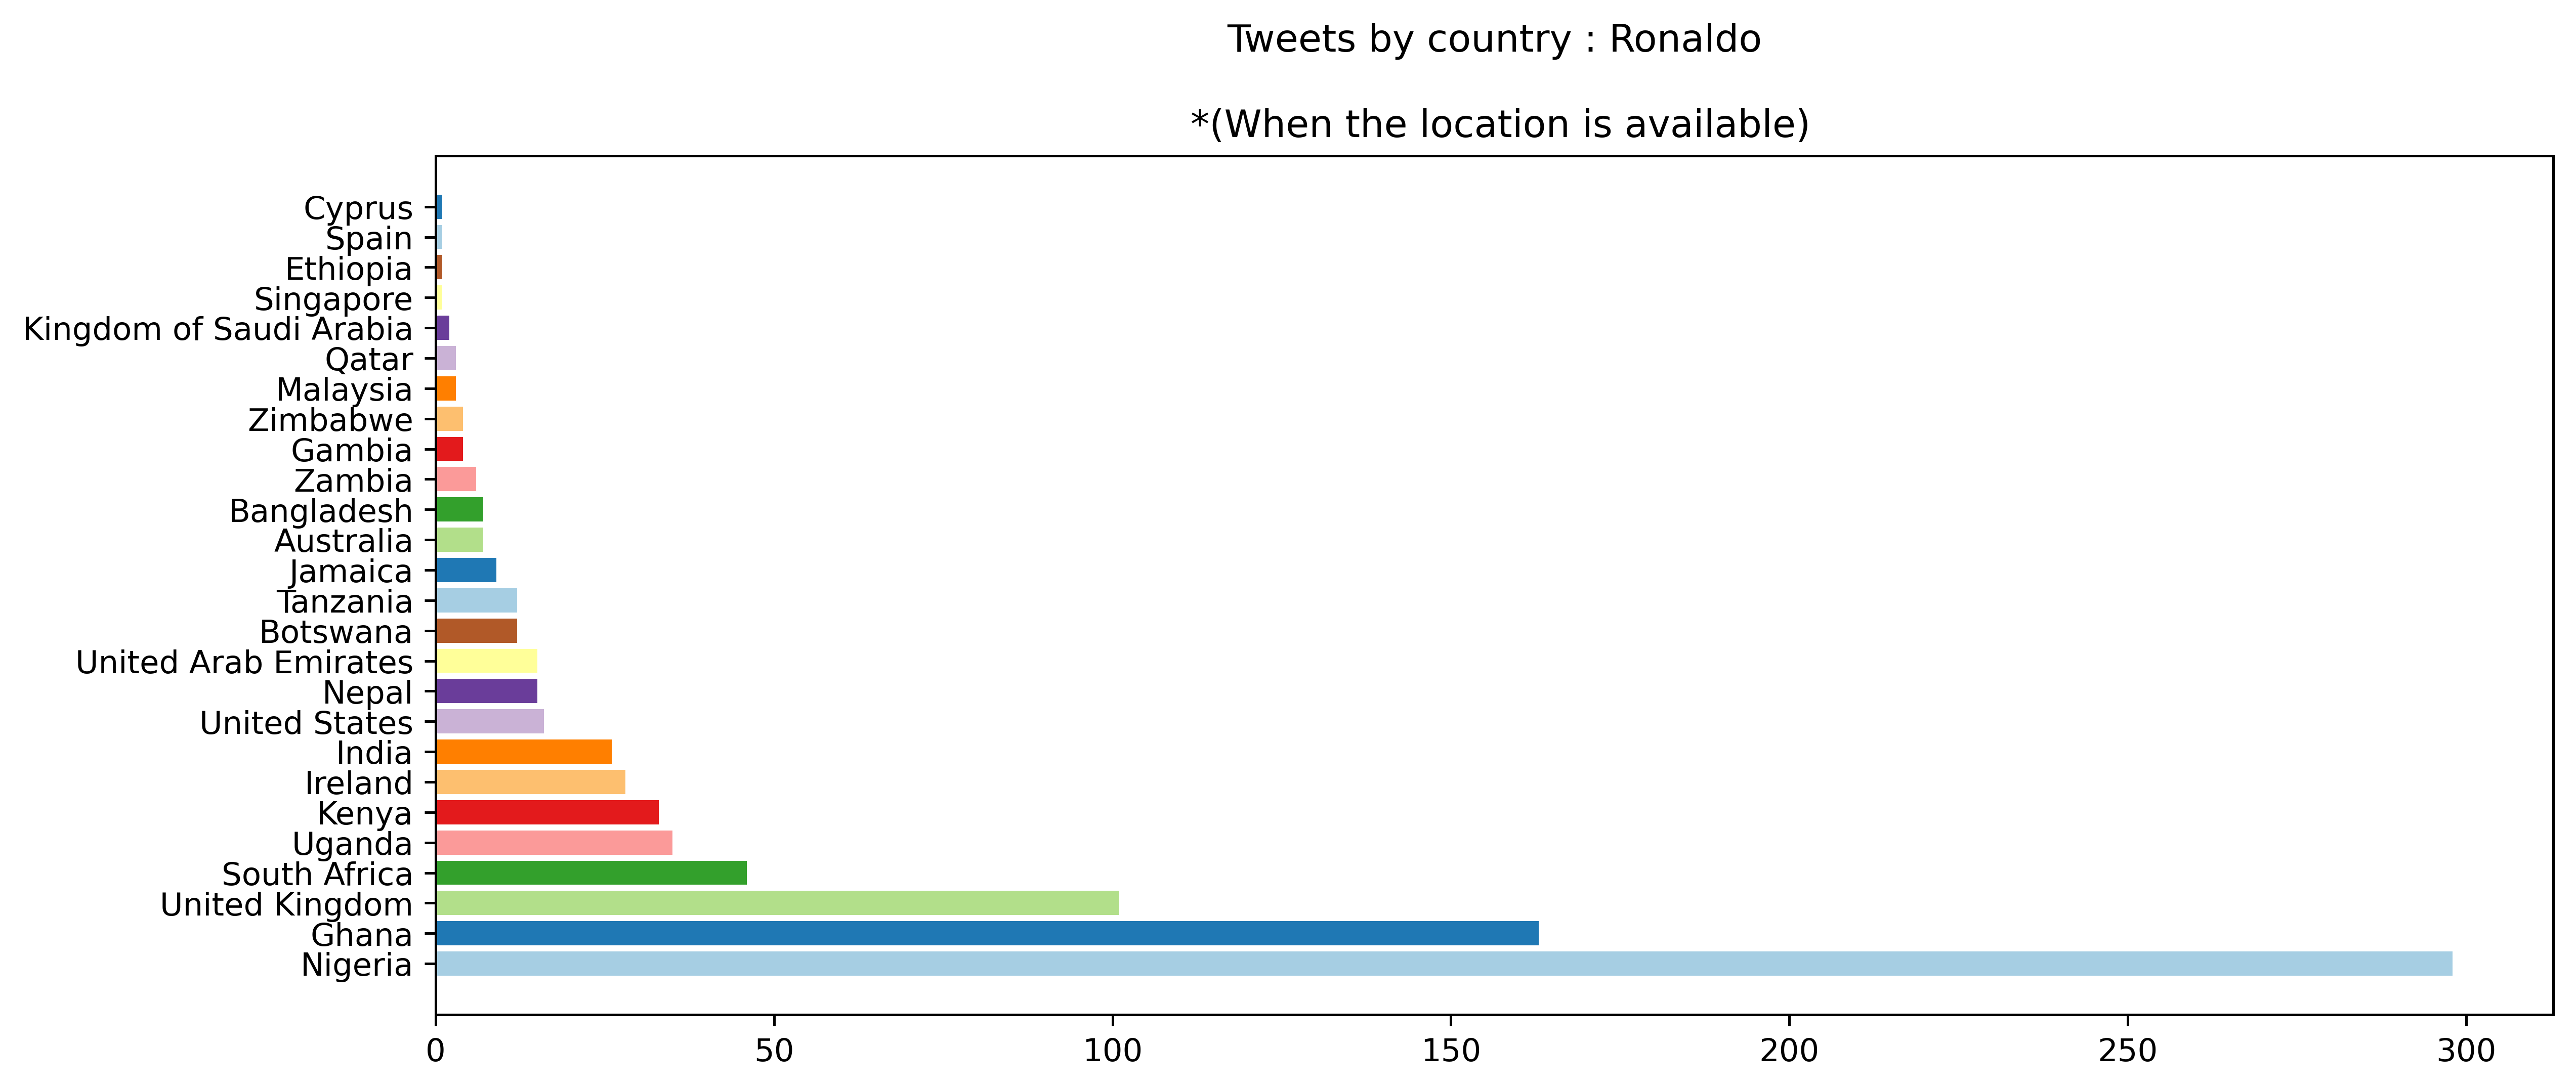

In [22]:
# Get the data
keys_ronaldo = list(top_countries_ronaldo.keys())
values_ronaldo = list(top_countries_ronaldo.values())

# Get the color map
color_map = plt.get_cmap("Paired")

# Setup the figure
plt.figure(figsize=(12,5), dpi=450)
# Set the title 
plt.title("Tweets by country : Ronaldo\n\n *(When the location is available)")
# Setup the plot
plt.barh(keys_ronaldo, values_ronaldo, color=color_map.colors)
# Display results
plt.show()

## Most popular sources 💻📱🖥

In [23]:
# Get the top sources
top_sources_messi = dataset_messi.source.value_counts().to_dict()
top_sources_ronaldo = dataset_ronaldo.source.value_counts().to_dict()

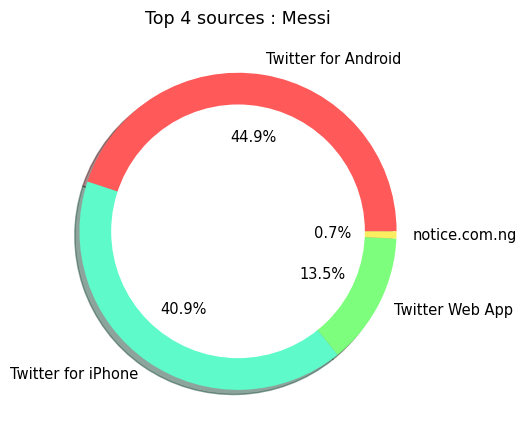

In [24]:
# Get the data
keys_messi = list(top_sources_messi.keys())
values_messi = list(top_sources_messi.values())


# Setup the figure
plt.figure(figsize=(12,5), dpi=105)
# Set the colors 
colors = ["#ff5959","#5ffac9","#7dff7d", "#faed5f"]
# Set the title 
plt.title("Top 4 sources : Messi")
# Setup the plot
plt.pie(
    values_messi[0:4], 
    labels=keys_messi[0:4], 
    autopct="%1.1f%%", 
    shadow=True, 
    colors=colors
)
# Draw the hollow part of the pie
centre_circle = plt.Circle(xy=(0,0),radius=0.80,facecolor="white")
# Get the current figure 
current_figure = plt.gcf()
# Get the current axis and add the hollow part to the figure
current_figure.gca().add_artist(centre_circle)
# Display results
plt.show()

### Many thanks to [this Medium article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) for the tips. (^_^)

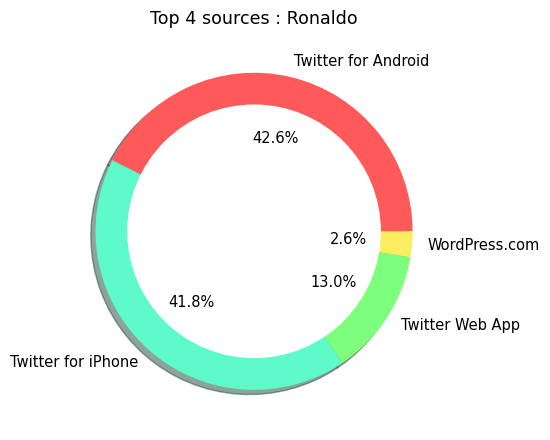

In [25]:
# Get the data
keys_ronaldo = list(top_sources_ronaldo.keys())
values_ronaldo = list(top_sources_ronaldo.values())

# Setup the figure
plt.figure(figsize=(12,5), dpi=105)
# Set the colors 
colors = ["#ff5959","#5ffac9","#7dff7d", "#faed5f"]
# Set the title 
plt.title("Top 4 sources : Ronaldo")
# Setup the plot
plt.pie(
    values_ronaldo[0:4], 
    labels=keys_ronaldo[0:4], 
    autopct="%1.1f%%", 
    shadow=True, 
    colors=colors
)
# Draw the hollow part of the pie
centre_circle = plt.Circle(xy=(0,0),radius=0.80,facecolor="white")
# Get the current figure 
current_figure = plt.gcf()
# Get the current axis and add the circle
current_figure.gca().add_artist(centre_circle)
# Display results
plt.show()

# Thank you for your time 😄